In [1]:
# download the corpus

%pip install datasets
from datasets import load_dataset
dataset = load_dataset("amazon_polarity")

Note: you may need to restart the kernel to use updated packages.


Found cached dataset parquet (/Users/hwanghaeeul/.cache/huggingface/datasets/parquet/amazon_polarity-d710a5a73b03c7f7/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%pip install PyICU
import icu

Note: you may need to restart the kernel to use updated packages.


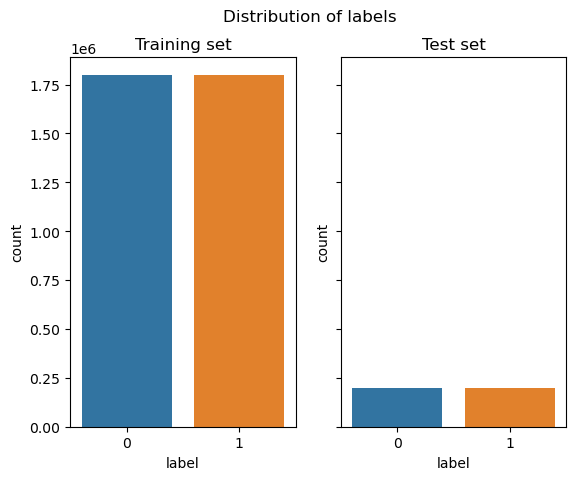

In [3]:
# plot the distribution of labels

df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

fig, ax = plt.subplots(1, 2, sharey=True)
sns.countplot(x='label', data=df_train, ax=ax[0])
sns.countplot(x='label', data=df_test, ax=ax[1])
ax[0].set_title('Training set')
ax[1].set_title('Test set')
fig.suptitle('Distribution of labels')

plt.show()

In [4]:
# df_train.head(10)

In [5]:
# df_test.head(10)

In [6]:
# 5 most common words

vectorizer = CountVectorizer(stop_words = 'english', max_features=5, tokenizer=str.split)

X_train = vectorizer.fit_transform(dataset['train']['title'])
X_test = vectorizer.fit_transform(dataset['test']['title'])
print(vectorizer.get_feature_names_out())

/Users/hwanghaeeul/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['best' 'book' "don't" 'good' 'great']


In [7]:
# observation matrix using CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english', max_features=1000, tokenizer=str.split)

X_train = vectorizer.fit_transform(dataset['train']['title'])
X_test = vectorizer.fit_transform(dataset['test']['title'])

In [8]:
# print("Training set :", X_train.shape, "\n", X_train.toarray())
# print("Test set :", X_test.shape, "\n", X_test.toarray())

In [9]:
# min_df = 1

vectorizer = CountVectorizer(stop_words = 'english', min_df=1, tokenizer=str.split)

X_train = vectorizer.fit_transform(dataset['train']['title'])
print("vocabulary size of training set :", len(vectorizer.get_feature_names_out()))

X_test = vectorizer.fit_transform(dataset['test']['title'])
print("vocabulary size of test set :", len(vectorizer.get_feature_names_out()))

vocabulary size of training set : 540218
vocabulary size of test set : 127488


In [10]:
# min_df = 2

vectorizer = CountVectorizer(stop_words = 'english', min_df=2, tokenizer=str.split)

X_train = vectorizer.fit_transform(dataset['train']['title'])
print("vocabulary size of training set :", len(vectorizer.get_feature_names_out()))

X_test = vectorizer.fit_transform(dataset['test']['title'])
print("vocabulary size of test set :", len(vectorizer.get_feature_names_out()))

vocabulary size of training set : 182502
vocabulary size of test set : 44246


In [11]:
# Training the model

vectorizer = CountVectorizer(stop_words = 'english', min_df=2, tokenizer=str.split)
X_train = vectorizer.fit_transform(dataset['train']['title'])
X_test = vectorizer.fit_transform(dataset['test']['title'])
y_train = dataset['train']['label']
y_test = dataset['test']['label']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy on the training set: ", model.score(X_train, y_train))

Accuracy on the training set:  0.8311719444444444


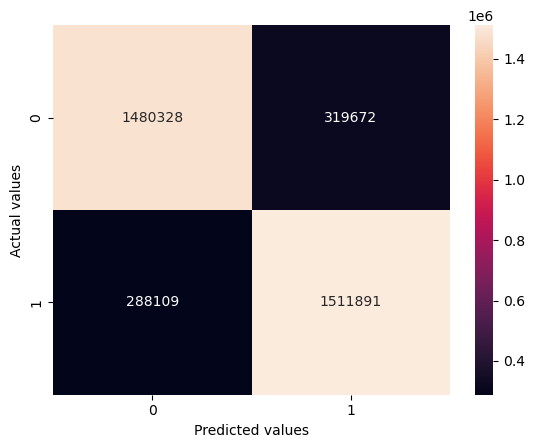

In [12]:
# confusion matrix

y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

Accuracy on the test set:  0.83537


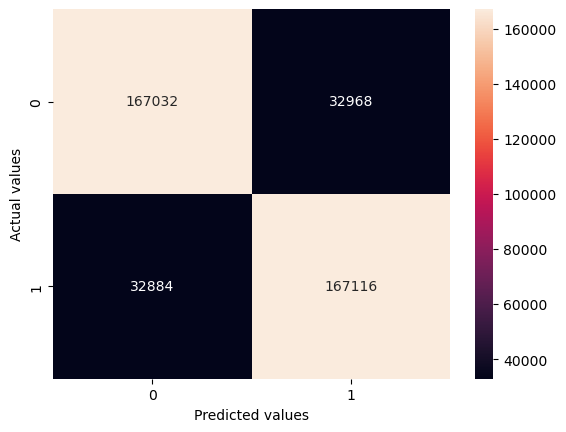

In [13]:
model.fit(X_test, y_test)
print("Accuracy on the test set: ", model.score(X_test, y_test))

# confusion matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

Correctly classified examples:  334148
Misclassified examples:  65852


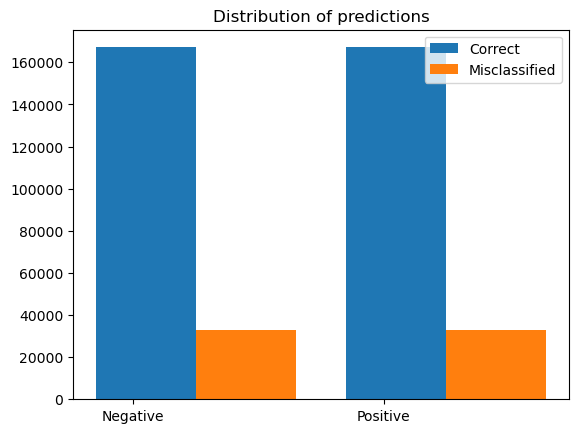

In [14]:
# plot the examples correctly classified and misclassified

y_pred = model.predict(X_test)
correct = (y_pred == y_test)

correct_indices = [i for i, x in enumerate(correct) if x]
incorrect_indices = [i for i, x in enumerate(correct) if not x]

print("Correctly classified examples: ", len(correct_indices))
print("Misclassified examples: ", len(incorrect_indices))

plt.hist([y_pred[correct_indices], y_pred[incorrect_indices]], bins=[0, 1, 2], label=['Correct', 'Misclassified'])
plt.legend(loc='upper right')
plt.xticks([0.25, 1.25], ['Negative', 'Positive'])
plt.title('Distribution of predictions')
plt.show()


In [15]:
# get the 100 most relevant words using l1 regularization

vectorizer = CountVectorizer(stop_words = 'english', min_df=2, tokenizer=str.split)
X_train = vectorizer.fit_transform(dataset['train']['title'])
X_test = vectorizer.fit_transform(dataset['test']['title'])
y_train = dataset['train']['label']
y_test = dataset['test']['label']

model = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
model.fit(X_test, y_test)

feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_100 = pd.Series(coefs, index=feature_names).sort_values(ascending=False).head(100)
print(top_100.keys())

/Users/hwanghaeeul/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Index(['australia!', 'outstanding!', 'fantastic!', 'rocks!', 'excellent!',
       'jordan's', 'perfect!', 'l-8000', 'must-read', 'awesome!', 'excellant',
       'fabulous!', 'wonderful!', 'awesome!!', 'underrated', 'superbly',
       'beautiful!', 'amazing!', 'excellent.', 'outstanding', 'touching',
       'awesome', 'penny!', 'excellent', 'delightful', 'amazing!!', 'winner!',
       'nice!', 'superb!', 'sooner!', 'childhood!', 'print...', 'favorite!',
       'haunting', 'thoughtful', 'great!!!', 'riveting', 'fantastic',
       'provoking', 'excelente', 'underappreciated', 'wonderfully',
       'invaluable', 'liger', 'excellent!!!', 'flawless', 'must-have',
       'chilling', 'finally!', 'gem!', 'kicks', 'indispensable', 'exceeded',
       'addictive!', 'another!', 'hilarious!', 'enchanting', 'delicious!',
       'excellent!!', 'best!!', 'cute!', 'brilliant', 'superb', 'rocks!!!',
       'hit!', 'thought-provoking', 'wonderful!!', 'classic!', 'yummy',
       'awsome!', 'sublime', 'wond

In [16]:
# language identification

# load the dataset

df = pd.read_csv('lid201-medium.tsv', sep='\t', header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'lid201-medium.tsv'

In [ ]:
# get only 1 percent of the data (because of memory issues)

df = df.sample(frac=0.01, random_state=10)

In [ ]:
# split the datset into training and test sets

X = df[0]
y = df[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# logistic regression classifier with tf-idf

vectorizer = TfidfVectorizer(ngram_range=(3, 3), analyzer='char')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
# evaluate the classifier

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
# average sentence length in characters

df['length'] = df[0].apply(len)
mean = df['length'].mean()
print("average sentence length in characters: ", mean)

# divide the dataset : short sentences and long sentences

short_sentences = df[df['length'] < mean]
long_sentences = df[df['length'] >= mean]

In [ ]:
# accuracy of the classifier on short sentences

short_sentences_vec = vectorizer.transform(short_sentences[0])
short_sentences_pred = classifier.predict(short_sentences_vec)
short_sentences_accuracy = accuracy_score(short_sentences[1], short_sentences_pred)
print("accuracy of the classifier on short sentences: ", short_sentences_accuracy)

# accuracy of the classifier on long sentences

long_sentences_vec = vectorizer.transform(long_sentences[0])
long_sentences_pred = classifier.predict(long_sentences_vec)
long_sentences_accuracy = accuracy_score(long_sentences[1], long_sentences_pred)
print("accuracy of the classifier on long sentences: ", long_sentences_accuracy)

In [ ]:
# compute the precision/recall for each class

print("classificaiton report for short sentences: \n", classification_report(short_sentences[1], short_sentences_pred))

In [ ]:
print("classificaiton report for long sentences: \n", classification_report(long_sentences[1], long_sentences_pred))

In [ ]:
# confusion matrix

cm_short = confusion_matrix(short_sentences[1], short_sentences_pred)
cm_long = confusion_matrix(long_sentences[1], long_sentences_pred)

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm_short, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for short sentences')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm_long, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for long sentences')
plt.show()

In [ ]:
scripts_icu = set([icu.Script.getScript(char).getName() for char in df[0].str.cat()])
print("number of scripts: ", len(scripts_icu))
print("scripts: ", scripts_icu)

In [ ]:
# remove non-latin characters

def remove_non_latin(text):
    for char in text:
        if icu.Script.getScript(char).getName() != 'Latin':
            text = text.replace(char, ' ')
    return text

df[0] = df[0].apply(remove_non_latin)
df = df[df[0].str.strip() != '']

In [ ]:
X = df[0]
y = df[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

vectorizer = TfidfVectorizer(ngram_range=(3, 3), analyzer='char')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy_score(y_test, y_pred))